In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


import wave

TensorFlow version: 2.6.0


In [2]:
import librosa
import pandas as pd
import os
import numpy as np
from tqdm import tqdm

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout

import IPython.display as ip

In [3]:
#importing  libraries
#Keras
import tensorflow.keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

#sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Others
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import tensorflow as tf
import pandas as pd
import seaborn as sns
import glob
import os
import pickle
import IPython.display as ipd
import csv
from tqdm import tqdm
import os


import sys
import os
import IPython
import math
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import random
from datetime import datetime
#from include import helpers

from tensorflow.keras import backend as keras_backend
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, SpatialDropout2D, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
#split the dataset into train and test
X_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_train_mfcc.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_train_mfcc.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_test_mfcc.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_test_mfcc.csv')
#take a peak at the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4499, 40), (4499, 1), (4233, 41), (4233, 2))

In [5]:
#One hot encode labels

le = LabelEncoder()

def encoding_y(data):
  data = np.array(data['label'])
  data = to_categorical(le.fit_transform(data))
  return data

y_train = encoding_y(y_train)
y_test = encoding_y(y_test)

In [6]:
X_test = X_test.iloc[:,1:41]

def standardization(data):
  mean = np.mean(data,axis=0)
  std = np.std(data, axis=0)
  data =( data - mean)/std
  data = np.array(data)
  data=np.reshape(data,(data.shape[0], 40, 1))
  return data

X_train = standardization(X_train)
X_test = standardization(X_test)

In [7]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.LSTM(
         units=128,activation='relu',
         return_sequences=True,
         input_shape=(40,1)
     ),
     tf.keras.layers.LSTM(
         units=64,activation='relu'
     ),
     tf.keras.layers.Dense(
         units=32,
         activation='relu'
     ),

     tf.keras.layers.Dense(
         units=10,
         activation='softmax'
     )

    ]
)

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40, 128)           66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 118,378
Trainable params: 118,378
Non-trainable params: 0
_________________________________________________________________


In [9]:
print("Train...")
model_mfcc=model.fit(X_train, y_train, batch_size=64, epochs=120, validation_data=(X_test, y_test))

Train...
Epoch 1/120
71/71 [==============================] - 53s 640ms/step - loss: 2.2028 - accuracy: 0.1785 - val_loss: 2.1834 - val_accuracy: 0.1779
Epoch 2/120
71/71 [==============================] - 44s 619ms/step - loss: 2.0750 - accuracy: 0.2272 - val_loss: 2.1022 - val_accuracy: 0.2221
Epoch 3/120
71/71 [==============================] - 53s 752ms/step - loss: 1.9895 - accuracy: 0.2734 - val_loss: 2.0415 - val_accuracy: 0.2844
Epoch 4/120
71/71 [==============================] - 53s 751ms/step - loss: 1.8768 - accuracy: 0.3163 - val_loss: 1.9943 - val_accuracy: 0.2648
Epoch 5/120
71/71 [==============================] - 45s 641ms/step - loss: 1.7684 - accuracy: 0.3632 - val_loss: 1.9073 - val_accuracy: 0.3501
Epoch 6/120
71/71 [==============================] - 38s 543ms/step - loss: 1.5859 - accuracy: 0.4412 - val_loss: 1.8950 - val_accuracy: 0.3546
Epoch 7/120
71/71 [==============================] - 28s 394ms/step - loss: 1.4868 - accuracy: 0.4748 - val_loss: 1.8393 - val_

71/71 [==============================] - 27s 378ms/step - loss: 0.2633 - accuracy: 0.9084 - val_loss: 3.4974 - val_accuracy: 0.4264
Epoch 58/120
71/71 [==============================] - 30s 416ms/step - loss: 0.2028 - accuracy: 0.9287 - val_loss: 3.7331 - val_accuracy: 0.4292
Epoch 59/120
71/71 [==============================] - 27s 376ms/step - loss: 0.1706 - accuracy: 0.9438 - val_loss: 3.8583 - val_accuracy: 0.4177
Epoch 60/120
71/71 [==============================] - 27s 388ms/step - loss: 0.1752 - accuracy: 0.9455 - val_loss: 3.6312 - val_accuracy: 0.4300
Epoch 61/120
71/71 [==============================] - 27s 388ms/step - loss: 0.1606 - accuracy: 0.9473 - val_loss: 3.7164 - val_accuracy: 0.4141
Epoch 62/120
71/71 [==============================] - 26s 375ms/step - loss: 0.1395 - accuracy: 0.9533 - val_loss: 3.6041 - val_accuracy: 0.4189
Epoch 63/120
71/71 [==============================] - 26s 371ms/step - loss: 0.1319 - accuracy: 0.9544 - val_loss: 3.7877 - val_accuracy: 0.421

71/71 [==============================] - 12s 165ms/step - loss: 0.0314 - accuracy: 0.9913 - val_loss: 5.2009 - val_accuracy: 0.4349
Epoch 114/120
71/71 [==============================] - 12s 163ms/step - loss: 0.0336 - accuracy: 0.9907 - val_loss: 5.2490 - val_accuracy: 0.4177
Epoch 115/120
71/71 [==============================] - 11s 161ms/step - loss: 0.0293 - accuracy: 0.9920 - val_loss: 5.3247 - val_accuracy: 0.4245
Epoch 116/120
71/71 [==============================] - 12s 166ms/step - loss: 0.1525 - accuracy: 0.9509 - val_loss: 4.1016 - val_accuracy: 0.4349
Epoch 117/120
71/71 [==============================] - 11s 155ms/step - loss: 0.0618 - accuracy: 0.9800 - val_loss: 4.6720 - val_accuracy: 0.4316
Epoch 118/120
71/71 [==============================] - 10s 145ms/step - loss: 0.0576 - accuracy: 0.9804 - val_loss: 4.8254 - val_accuracy: 0.4174
Epoch 119/120
71/71 [==============================] - 10s 137ms/step - loss: 0.0340 - accuracy: 0.9902 - val_loss: 4.9684 - val_accuracy:

In [10]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(X_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40, 128)           66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 118,378
Trainable params: 118,378
Non-trainable params: 0
_________________________________________________________________
133/133 [==============================] - 5s 21ms/step - loss: 5.3668 - accuracy: 0.4158
Pre-training accuracy: 41.5781%


In [11]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9868859648704529
Testing Accuracy:  0.41578078269958496


In [12]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.41578078269958496


In [13]:
#model.predict_classes(X_test)
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

[8 8 8 ... 9 2 1]


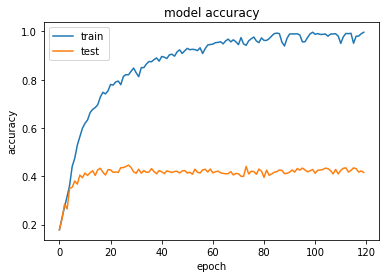

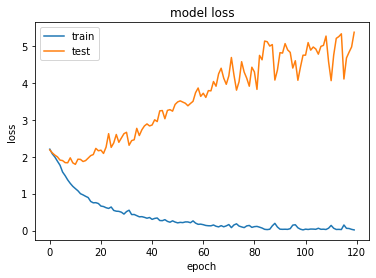

In [14]:
# summarize history for accuracy
plt.plot(model_mfcc.history['accuracy'])
plt.plot(model_mfcc.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_mfcc.history['loss'])
plt.plot(model_mfcc.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
#Avg Test accuracy and Standart Devision 

In [16]:
train_hist = pd.DataFrame(model_mfcc.history)
train_hist

,loss,accuracy,val_loss,val_accuracy
0,2.202811,0.178484,2.183433,0.177888
1,2.075008,0.227162,2.102201,0.222065
2,1.989537,0.273394,2.041492,0.284432
3,1.876765,0.316293,1.994313,0.264824
4,1.768376,0.363192,1.907278,0.350106
...,...,...,...,...
115,0.152459,0.950878,4.101604,0.434916
116,0.061826,0.979996,4.671988,0.431609
117,0.057615,0.980440,4.825429,0.417434
118,0.033980,0.990220,4.968353,0.422159


In [17]:
print(train_hist["val_accuracy"].describe())

count    120.000000
mean       0.411838
std        0.036266
min        0.177888
25%        0.411588
50%        0.418498
75%        0.425998
max        0.446256
Name: val_accuracy, dtype: float64


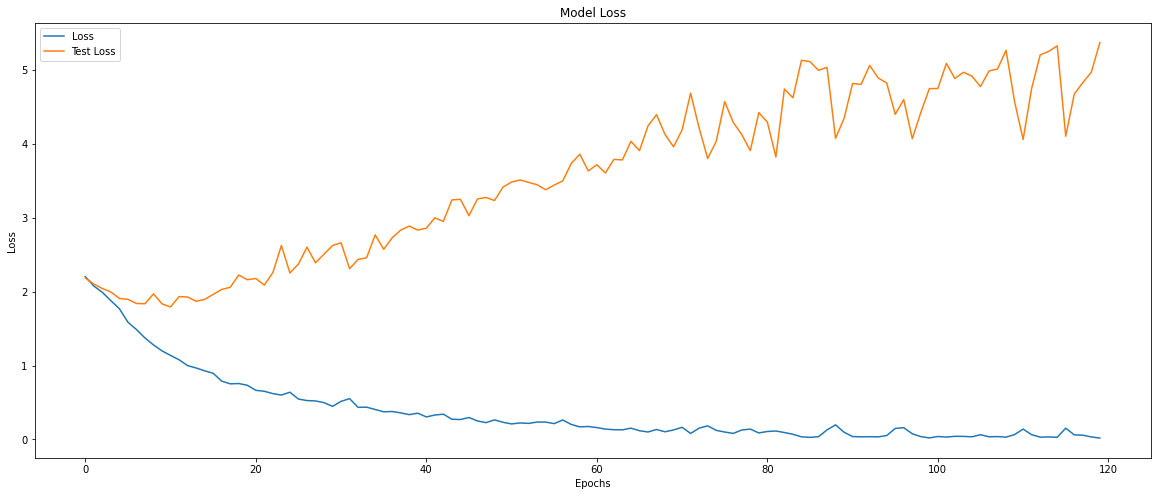

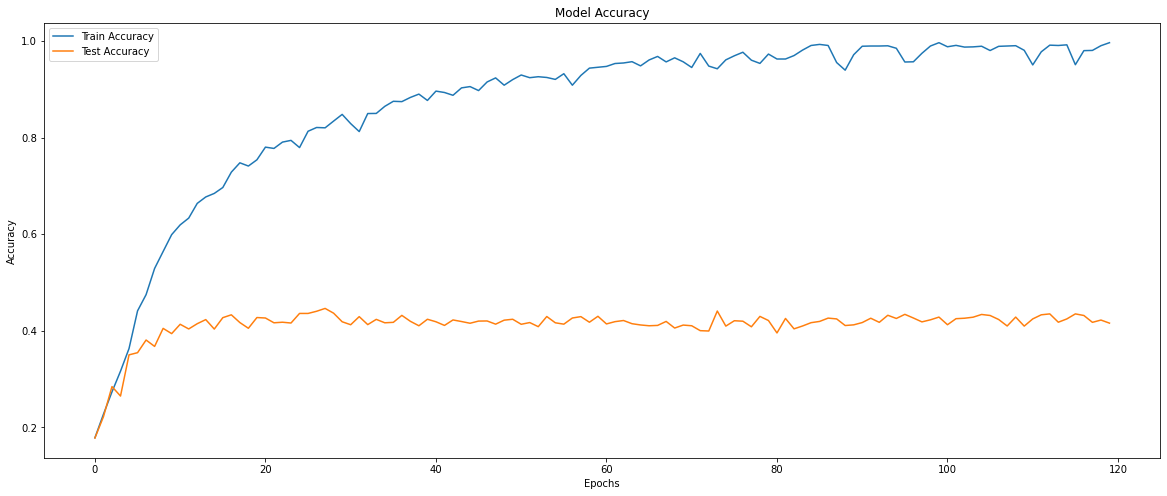

In [18]:
plt.figure(figsize=(20,8))
plt.plot(train_hist[['loss','val_loss']])
plt.legend(['Loss','Test Loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(train_hist[['accuracy','val_accuracy']])
plt.legend(['Train Accuracy','Test Accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [19]:
ytrue = np.argmax(y_test,axis=1)
ypred = np.argmax(model.predict(X_test),axis=1)
print('\nConfusion Matrix :\n\n')
print(confusion_matrix(ytrue,ypred))
print('\n\nClassification Report : \n\n',classification_report(ytrue,ypred))


Confusion Matrix :


[[ 70   3 100  27  32  26  15 105  16 106]
 [  4 145   5   9   8   2   1  17   1  29]
 [ 11   2 191 149  27  13  28   3  37  39]
 [  5   4  83 287  23   7  11   6  40  34]
 [  4  12  57  33 152  18   2 113   9 100]
 [ 70   4  54  35   4 220   2  10  41  43]
 [  2   0  29  26   2   2 110   0   8   5]
 [ 11  43  11   3 200   9   2 116   6  51]
 [ 12   1  28 106  13   2   7   2 201  21]
 [ 31   7  56  34  54   7   4  16  23 268]]


Classification Report : 

               precision    recall  f1-score   support

           0       0.32      0.14      0.19       500
           1       0.66      0.66      0.66       221
           2       0.31      0.38      0.34       500
           3       0.40      0.57      0.47       500
           4       0.30      0.30      0.30       500
           5       0.72      0.46      0.56       483
           6       0.60      0.60      0.60       184
           7       0.30      0.26      0.28       452
           8       0.53      0.